In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('../input/heart-disease/heart.csv')
df.describe(include='all')
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
y=df['target']
x=df.drop(['target'],axis=1)

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [6]:
clf.score(x_test,y_test)

0.7213114754098361

In [7]:
from sklearn.model_selection import cross_val_score
validation=cross_val_score(clf,x_test,y_test,cv=5)
validation

array([0.61538462, 0.83333333, 1.        , 0.75      , 0.66666667])

In [8]:
from sklearn.metrics import roc_curve
y_preds=clf.predict_proba(x_test)
y_preds_positive=y_preds[:,1]
y_preds_positive

array([0.18, 0.32, 0.2 , 0.5 , 0.23, 0.21, 0.08, 0.36, 0.02, 0.91, 0.1 ,
       0.24, 0.59, 0.51, 0.46, 0.68, 0.77, 0.03, 0.81, 0.35, 0.25, 0.03,
       0.11, 0.09, 0.9 , 0.5 , 0.02, 0.4 , 0.6 , 0.37, 1.  , 0.18, 0.84,
       0.69, 0.81, 0.09, 0.42, 0.16, 0.52, 0.12, 0.11, 0.21, 0.95, 0.74,
       0.64, 0.7 , 0.05, 0.21, 0.82, 0.34, 0.72, 0.38, 0.99, 0.64, 0.81,
       0.1 , 0.59, 0.03, 0.82, 0.58, 0.44])

In [9]:
from sklearn.metrics import roc_auc_score
roc_score=roc_auc_score(y_test,y_preds_positive)
roc_score

0.8839869281045751

In [10]:
fpr,tpr,thresholds=roc_curve(y_test,clf.predict(x_test))

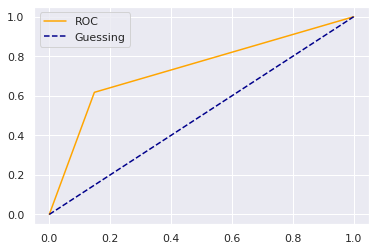

In [11]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC',)
    plt.plot([0,1],[0,1],color='darkblue',label='Guessing',linestyle="--")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [12]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test,clf.predict(x_test))
conf

array([[23,  4],
       [13, 21]])

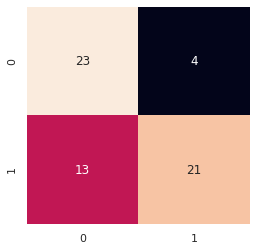

In [13]:
def plot_conf_matrix(conf):
    f,ax=plt.subplots(figsize=(4,4))
    ax=sns.heatmap(conf,annot=True,cbar=False)

plot_conf_matrix(conf)

In [14]:
y_test=y_test.reset_index(drop=True)

In [15]:

df_pf=pd.DataFrame()
df_pf['Actual']=y_test
df_pf['Predicted']=clf.predict(x_test)

pd.options.display.max_rows=999
df_pf

,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,1,1
